# Exploratory Data Analysis

In [213]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

%matplotlib inline
get_ipython().run_line_magic('matplotlib', 'inline')

In [214]:
train = pd.read_csv('./datasets/trains_2.csv')

In [215]:
test = pd.read_csv('./datasets/test_2.csv')

In [216]:
test.shape

(879, 73)

In [217]:
train.head()

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,...,44,0,0,0,0,0,3,2010,WD,130500
1,1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,...,74,0,0,0,0,0,4,2009,WD,220000
2,2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,...,52,0,0,0,0,0,1,2010,WD,109000
3,3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,0,4,2010,WD,174000
4,4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,...,59,0,0,0,0,0,3,2010,WD,138500


In [218]:
#Drop the Unnamed: 0 column for test and train
train.drop(columns='Unnamed: 0', inplace=True)
test.drop(columns='Unnamed: 0', inplace=True)

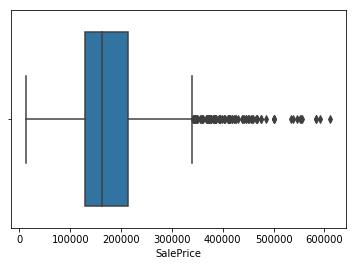

In [219]:
#distribution of Salesprice 
sns.boxplot(train['SalePrice']);

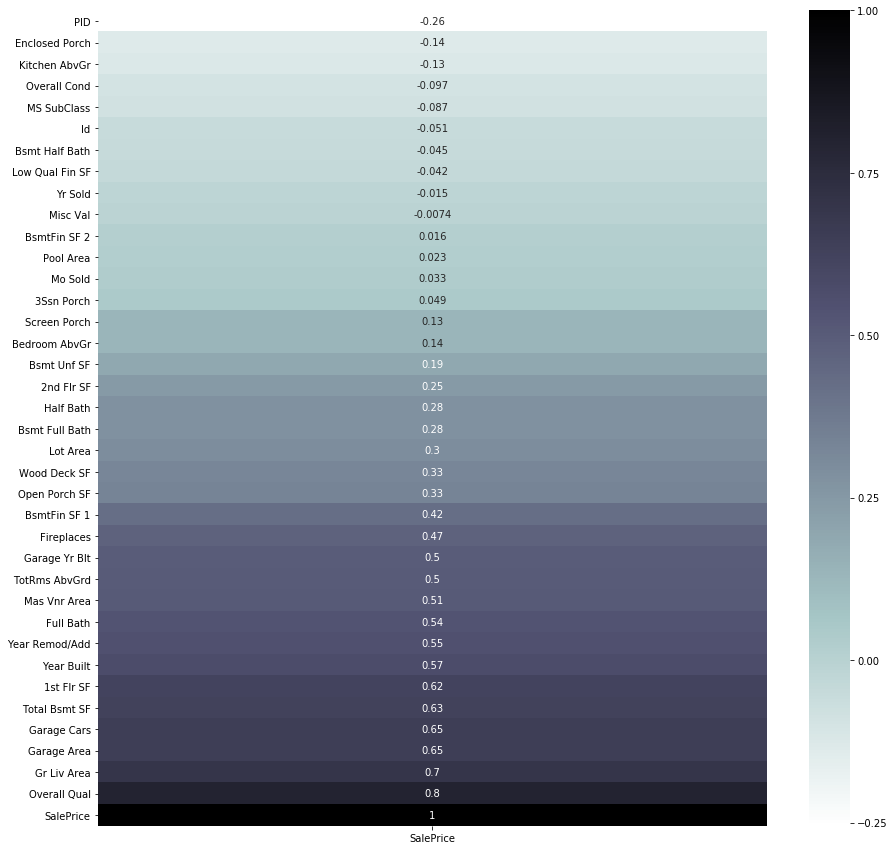

In [220]:
plt.figure(figsize = (15,15))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice'), 
            annot = True, 
            cmap ='bone_r');

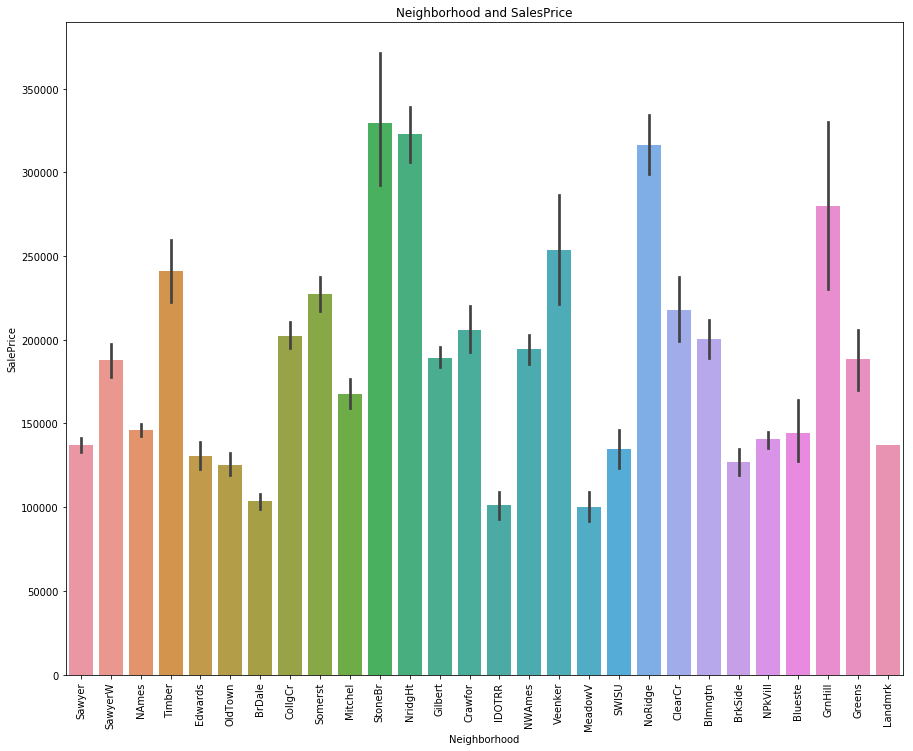

In [221]:
plt.figure(figsize= (15,12))
sns.barplot(x = train['Neighborhood'], y = train['SalePrice'])
plt.title('Neighborhood and SalesPrice')
plt.xticks(rotation=90);

In [222]:
#grouping average sales price by building type
building = train.groupby('Bldg Type', as_index=True)['SalePrice'].mean()

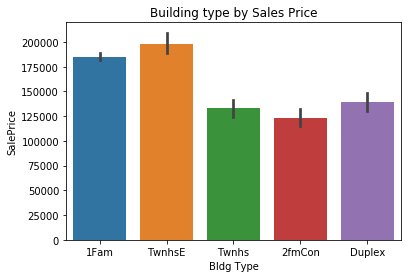

In [223]:
#is there a relationship with Building type and sales price? 
sns.barplot(x = train['Bldg Type'], y = train['SalePrice'])
plt.title('Building type by Sales Price');

In [224]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,...,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,...,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,...,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,...,59,0,0,0,0,0,3,2010,WD,138500


In [225]:
#Create a dummy variable called Best Quality to describe homes with an overall condition of 5 or more.
#5 is "aveage" on the scale. 
train['Best Condition'] = (train['Overall Cond'] >= 5).astype(int)

In [226]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Best Condition
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,3,2010,WD,130500,1
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,4,2009,WD,220000,1
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,1,2010,WD,109000,1
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2010,WD,174000,1
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,138500,1


In [227]:
#What I do the the train DF, I'll also do to the test. 
test['Best Condition'] = (test['Overall Cond'] >= 5).astype(int)

In [228]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Best Condition
0,2658,902301120,190,RM,9142,Pave,Reg,Lvl,AllPub,Inside,...,60,112,0,0,0,0,4,2006,WD,1
1,2718,905108090,90,RL,9662,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,8,2006,WD,0
2,2414,528218130,60,RL,17104,Pave,IR1,Lvl,AllPub,Inside,...,24,0,0,0,0,0,9,2006,New,1
3,1989,902207150,30,RM,8520,Pave,Reg,Lvl,AllPub,Inside,...,0,184,0,0,0,0,7,2007,WD,1
4,625,535105100,20,RL,9500,Pave,IR1,Lvl,AllPub,Inside,...,76,0,0,185,0,0,7,2009,WD,1


In [229]:
test.shape

(879, 73)

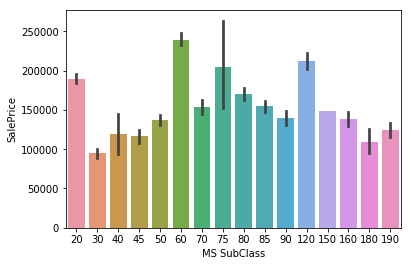

In [230]:
#Barplot of dwelling type by salesprice 

#the highest:
#060 --> 2-STORY 1946 & NEWER has the highest sales price
#120 --> 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
#020 --> 1-STORY 1946 & NEWER ALL STYLES

#the lowest: 
#030 --> 1-STORY 1945 & OLDER


sns.barplot(x = train['MS SubClass'], y = train['SalePrice']);

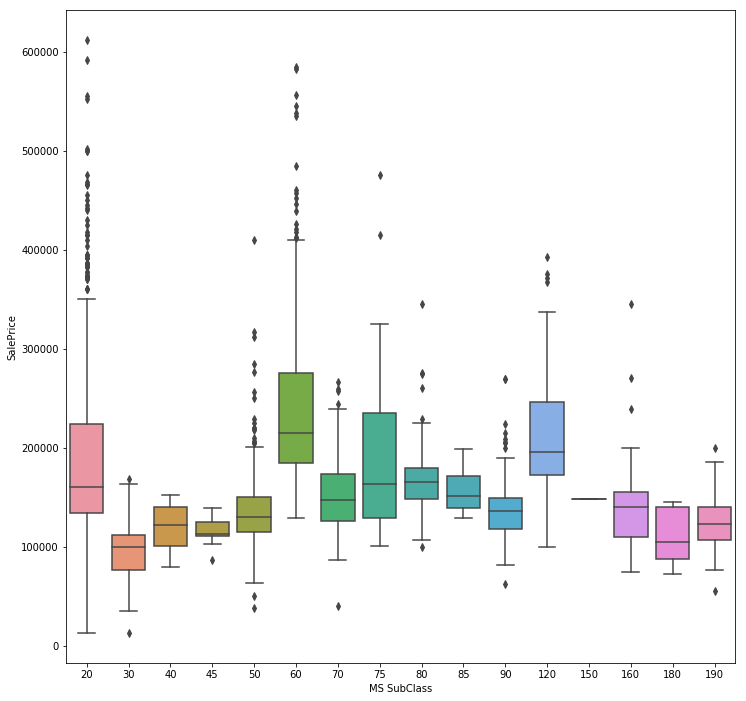

In [280]:
plt.figure(figsize=(12,12))
sns.boxplot(x = train['MS SubClass'], y = train['SalePrice']);

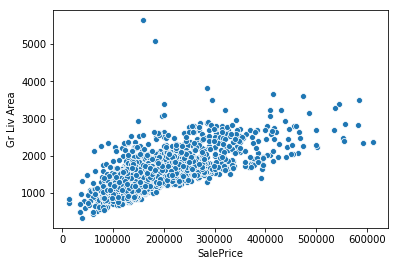

In [231]:
sns.scatterplot(x = train['SalePrice'], y = train['Gr Liv Area'])

The barplot above seems to suggest that newer homes seem to be priced higher than other homes. 

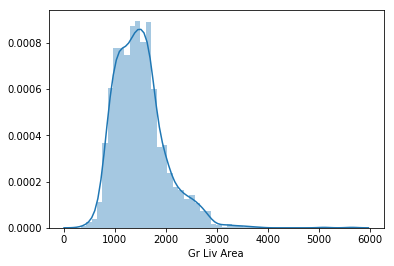

In [232]:
#distribution of square footage 
sns.distplot(train['Gr Liv Area']);

In [233]:
train['Total Sqft'] = train['Gr Liv Area'] + train['Total Bsmt SF'] - train['Low Qual Fin SF']
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Best Condition,Total Sqft
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,3,2010,WD,130500,1,2204.0
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,4,2009,WD,220000,1,3035.0
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,1,2010,WD,109000,1,2114.0
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2010,WD,174000,1,1828.0
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,3,2010,WD,138500,1,2121.0


In [234]:
test['Total Sqft'] = test['Gr Liv Area'] + test['Total Bsmt SF'] - test['Low Qual Fin SF']
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Best Condition,Total Sqft
0,2658,902301120,190,RM,9142,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2006,WD,1,2948
1,2718,905108090,90,RL,9662,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2006,WD,0,3934
2,2414,528218130,60,RL,17104,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,New,1,2150
3,1989,902207150,30,RM,8520,Pave,Reg,Lvl,AllPub,Inside,...,184,0,0,0,0,7,2007,WD,1,1936
4,625,535105100,20,RL,9500,Pave,IR1,Lvl,AllPub,Inside,...,0,0,185,0,0,7,2009,WD,1,2788


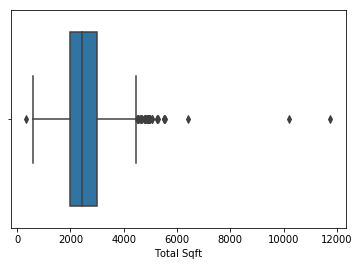

In [268]:
#I created a new column with total square footage, which also has a lot of outliers in this column
sns.boxplot(train['Total Sqft'])

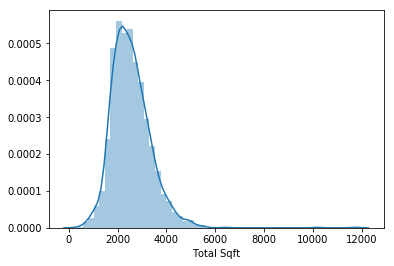

In [269]:
sns.distplot(train['Total Sqft'])

In [293]:
#grouping by neighborhood and average salesprice
train.groupby('Neighborhood', as_index=True)['SalePrice'].mean().sort_values(ascending = False)

Neighborhood
StoneBr    329675.736842
NridgHt    322831.352459
NoRidge    316294.125000
GrnHill    280000.000000
Veenker    253570.588235
Timber     241051.354167
Somerst    227183.900000
ClearCr    217490.074074
Crawfor    205901.211268
CollgCr    202497.216667
Blmngtn    200417.681818
NWAmes     194619.022989
Gilbert    189228.387931
Greens     188666.666667
SawyerW    187760.160920
Mitchel    167656.707317
NAmes      145905.816129
Blueste    144566.666667
NPkVill    140476.470588
Sawyer     137181.909910
Landmrk    137000.000000
SWISU      134758.875000
Edwards    130493.468531
BrkSide    127022.697368
OldTown    125276.300613
BrDale     103371.052632
IDOTRR     101103.188406
MeadowV    100231.250000
Name: SalePrice, dtype: float64

In [239]:
#grouping Neighborhood and salesprice by median value
train.groupby('Neighborhood', as_index=True)['SalePrice'].median()

Neighborhood
Blmngtn    192250
Blueste    137500
BrDale     105500
BrkSide    128000
ClearCr    225000
CollgCr    200000
Crawfor    199500
Edwards    125000
Gilbert    180750
Greens     190000
GrnHill    280000
IDOTRR     102000
Landmrk    137000
MeadowV     92450
Mitchel    160000
NAmes      141000
NPkVill    143000
NWAmes     185000
NoRidge    300750
NridgHt    317500
OldTown    120000
SWISU      136200
Sawyer     135000
SawyerW    181000
Somerst    224000
StoneBr    322450
Timber     220000
Veenker    260000
Name: SalePrice, dtype: int64

In [240]:
#Creating dummy variables for building type, Exerior Condition, and Lot shape in both train and test
train = pd.get_dummies(train, columns = ['Bldg Type', 'Exter Cond', 'Lot Shape', 'Sale Type'])

test = pd.get_dummies(test, columns = ['Bldg Type', 'Exter Cond', 'Lot Shape', 'Sale Type'])

In [241]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Land Contour,Utilities,Lot Config,Land Slope,...,Lot Shape_Reg,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,60,RL,13517,Pave,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,0,0,0,0,1
1,544,531379050,60,RL,11492,Pave,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,0,0,0,0,1
2,153,535304180,20,RL,7922,Pave,Lvl,AllPub,Inside,Gtl,...,1,0,0,0,0,0,0,0,0,1
3,318,916386060,60,RL,9802,Pave,Lvl,AllPub,Inside,Gtl,...,1,0,0,0,0,0,0,0,0,1
4,255,906425045,50,RL,14235,Pave,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,1


In [242]:
test.shape

(879, 94)

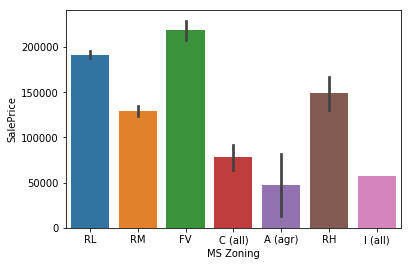

In [270]:
#FV appears to have homes that have the highest prices
sns.barplot(x = train['MS Zoning'], y = train['SalePrice']);

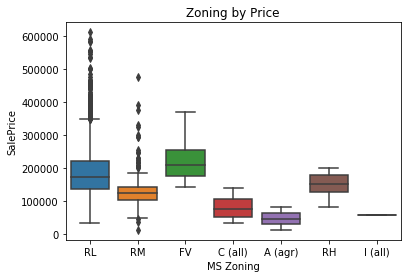

In [290]:
#RL has the largest distribution
sns.boxplot(x = train['MS Zoning'], y = train['SalePrice'])
plt.title('Zoning by Price');

A	Agriculture
C	Commercial
FV	Floating Village Residential
I	Industrial
RH	Residential High Density
RL	Residential Low Density
RP	Residential Low Density Park 
RM	Residential Medium Density

It would seem that commercial zones have the lowest prices, and Floating village residential has the highest sales prices for homes. 

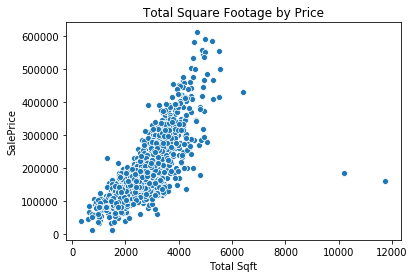

In [289]:
sns.scatterplot(x= train['Total Sqft'], y = train['SalePrice'])
plt.title('Total Square Footage by Price');

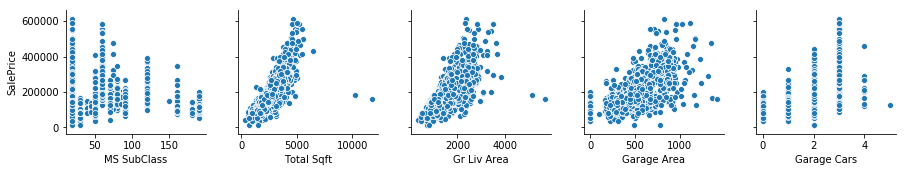

In [294]:
sns.pairplot(train, x_vars =['MS SubClass', 'Total Sqft', 'Gr Liv Area', 'Garage Area', 'Garage Cars'],
            y_vars = ['SalePrice']);

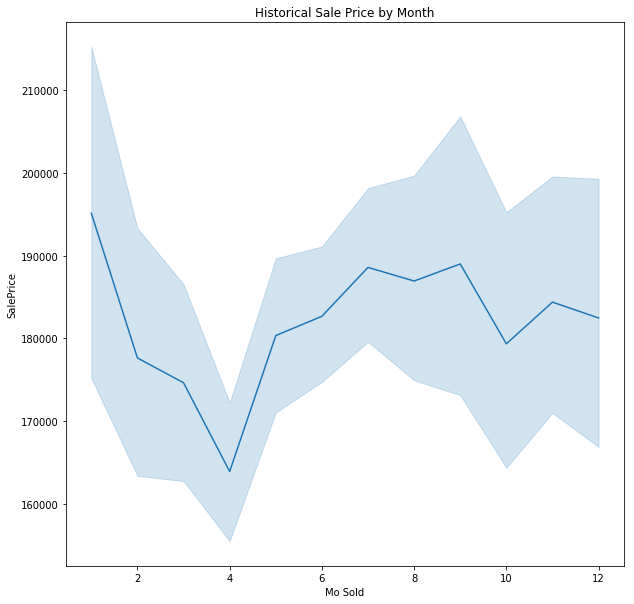

In [288]:
#This would suggest that the best time to buy a house is around April, when the housing prices were at its lowest.
plt.figure(figsize=(10,10))
x = train['Mo Sold']
y=train['SalePrice']
ax = sns.lineplot(x, y, data=train)
plt.title('Historical Sale Price by Month');

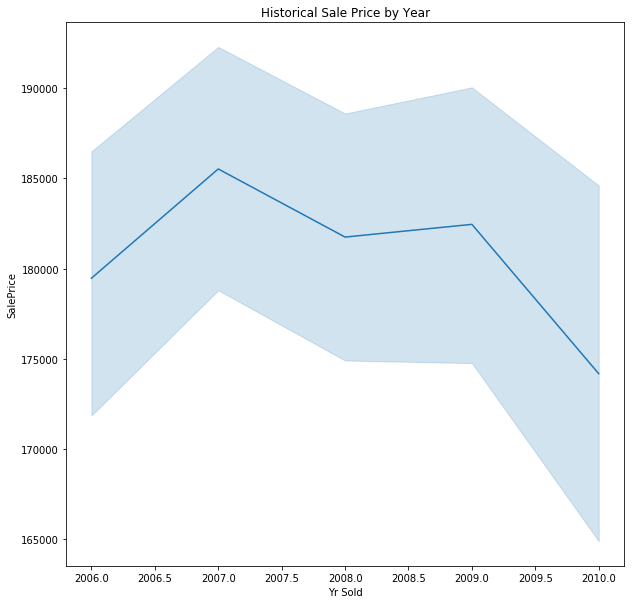

In [287]:
plt.figure(figsize=(10,10))
x = train['Yr Sold']
y=train['SalePrice']
ax = sns.lineplot(x, y, data=train)
plt.title('Historical Sale Price by Year');

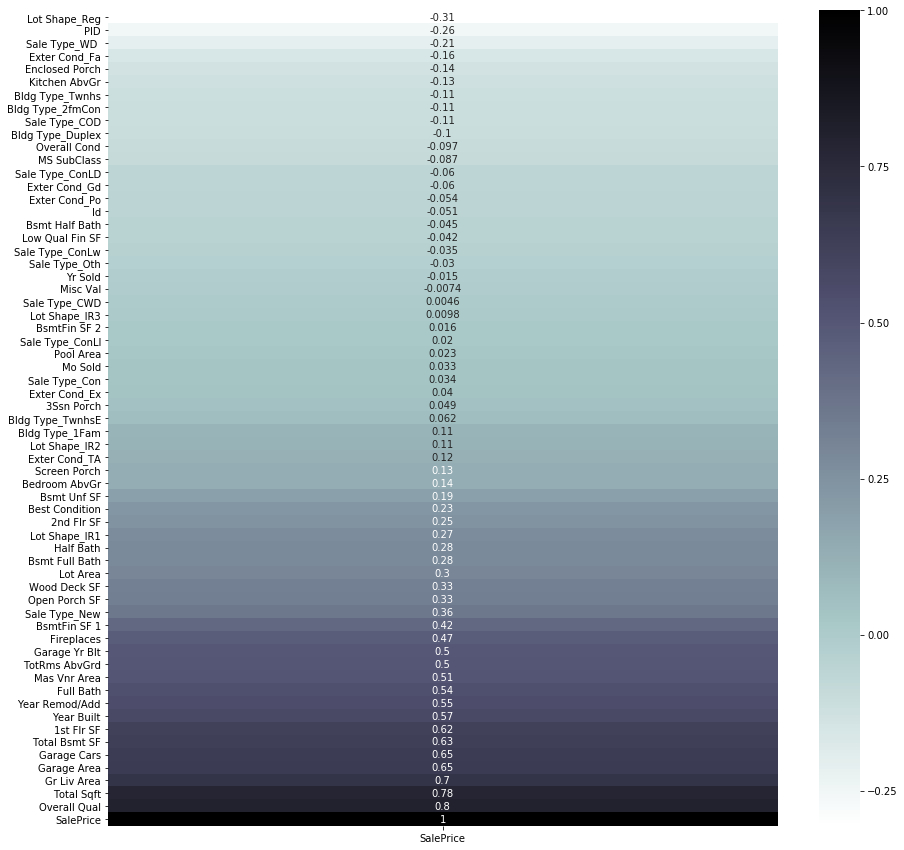

In [247]:
plt.figure(figsize = (15,15))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice'), 
            annot = True, 
            cmap ='bone_r');

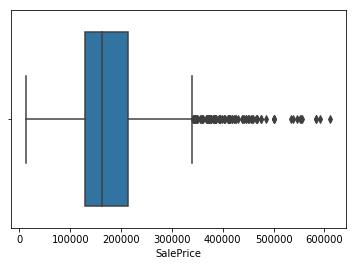

In [248]:
sns.boxplot(train['SalePrice']);

In [249]:
target = np.log(train['SalePrice'])

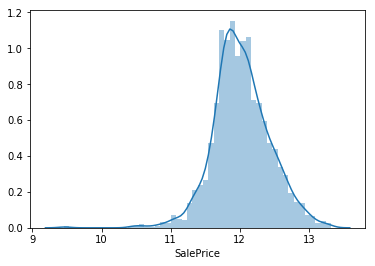

In [250]:
sns.distplot(target)

In [251]:
test.shape

(879, 94)

In [252]:
trains_3 = train.to_csv('./datasets/trains_3.csv')

test_3 = test.to_csv('./datasets/test_3.csv')